In [7]:
import pandas as pd
import requests

# Direct download link
url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"

# Download the CSV file
response = requests.get(url)
open('data.csv', 'wb').write(response.content)

# Load the CSV into a DataFrame
df = pd.read_csv('data.csv')

# Display the first few rows of the DataFrame
print(df.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].value_counts())
    print("\n")


Unique values in column 'CustomerID':
CustomerID
C0001    1
C0138    1
C0128    1
C0129    1
C0130    1
        ..
C0070    1
C0071    1
C0072    1
C0073    1
C0200    1
Name: count, Length: 200, dtype: int64


Unique values in column 'CustomerName':
CustomerName
Lawrence Carroll     1
Cynthia Clayton      1
Henry Leach          1
Marcus Livingston    1
Robert Jones         1
                    ..
Timothy Perez        1
Taylor Murphy        1
Sarah Scott          1
Heidi Johnson        1
Kelly Cross          1
Name: count, Length: 200, dtype: int64


Unique values in column 'Region':
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


Unique values in column 'SignupDate':
SignupDate
2024-11-11    3
2022-04-16    3
2024-02-05    2
2024-09-17    2
2022-03-14    2
             ..
2022-03-15    1
2022-07-01    1
2024-07-24    1
2022-08-20    1
2023-06-11    1
Name: count, Length: 179, dtype: int64




In [12]:
# Overview of the dataset
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Summary statistics (for numerical columns if any)
print("\nDataset Description:\n", df.describe(include='all'))
                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Duplicate Rows: 0

Dataset Description:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [14]:
df['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [15]:
# Unique CustomerIDs
print("\nUnique CustomerIDs:", df['CustomerID'].nunique())

# Check if all CustomerIDs are unique
print("\nAre CustomerIDs Unique?", df['CustomerID'].is_unique)



Unique CustomerIDs: 200

Are CustomerIDs Unique? True


In [16]:
# Top 5 most common names
print("\nMost Common Customer Names:\n", df['CustomerName'].value_counts().head())



Most Common Customer Names:
 CustomerName
Lawrence Carroll     1
Cynthia Clayton      1
Henry Leach          1
Marcus Livingston    1
Robert Jones         1
Name: count, dtype: int64



Regional Distribution:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


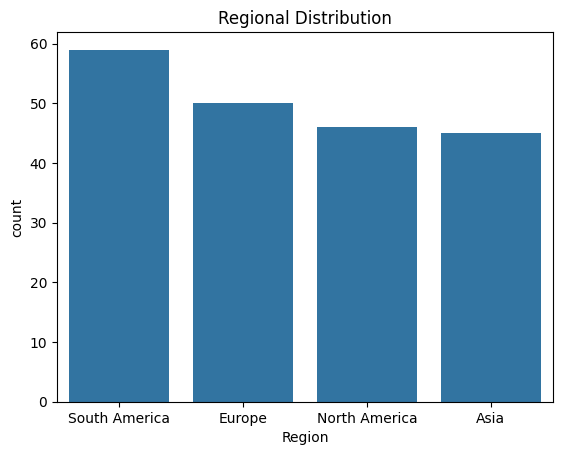

In [19]:
# Regional Distribution
print("\nRegional Distribution:\n", df['Region'].value_counts())

# Visualizing regional distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title("Regional Distribution")
plt.show()



Signup Date Range: 2022-01-22 00:00:00 to 2024-12-28 00:00:00


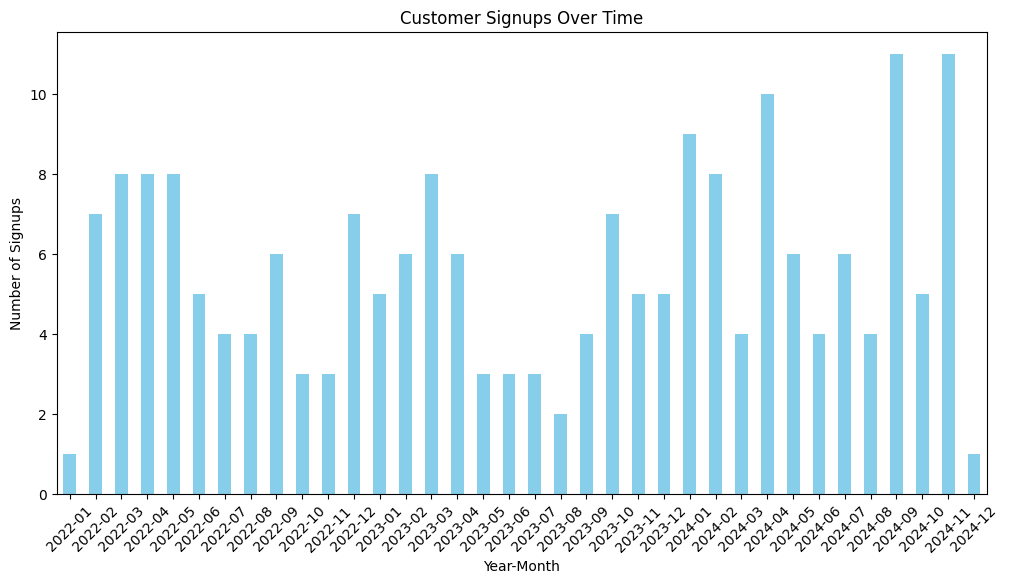

In [20]:
# Convert SignupDate to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

# Date Range
print("\nSignup Date Range:", df['SignupDate'].min(), "to", df['SignupDate'].max())

# Signup distribution over time
df['SignupYearMonth'] = df['SignupDate'].dt.to_period('M')

signup_distribution = df['SignupYearMonth'].value_counts().sort_index()

# Plot
signup_distribution.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Customer Signups Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()


In [21]:
# Ensure SignupDate is in datetime format
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

# Extract Year-Month for grouping
df['YearMonth'] = df['SignupDate'].dt.to_period('M')

# Group by YearMonth and count signups
monthly_signups = df.groupby('YearMonth').size()

# Display the first few rows
print(monthly_signups)


YearMonth
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, dtype: int64


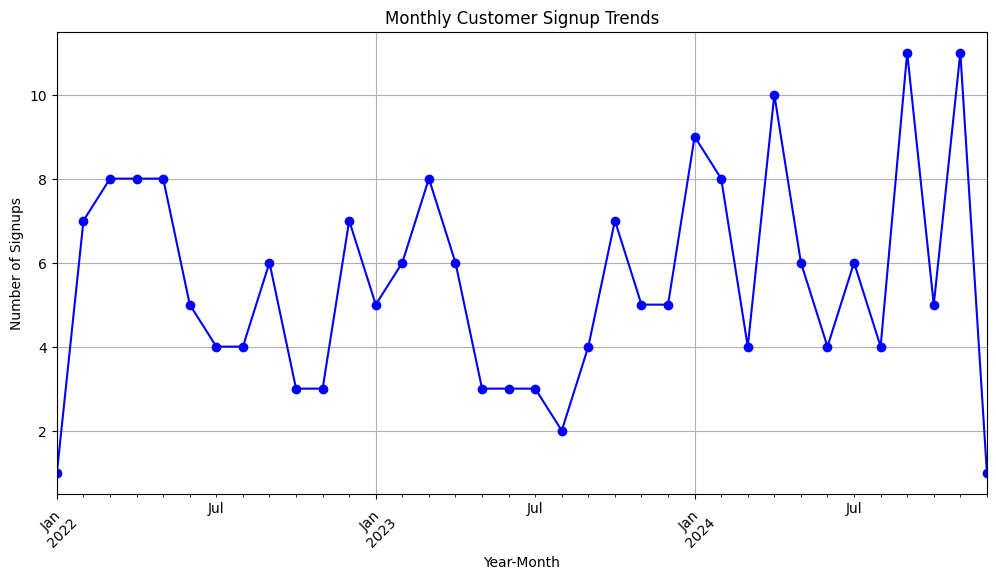

In [22]:
import matplotlib.pyplot as plt

# Plot monthly signup trends
monthly_signups.plot(kind='line', figsize=(12, 6), color='blue', marker='o')
plt.title("Monthly Customer Signup Trends")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


YearMonth
2022-01           NaN
2022-02    600.000000
2022-03     14.285714
2022-04      0.000000
2022-05      0.000000
2022-06    -37.500000
2022-07    -20.000000
2022-08      0.000000
2022-09     50.000000
2022-10    -50.000000
2022-11      0.000000
2022-12    133.333333
2023-01    -28.571429
2023-02     20.000000
2023-03     33.333333
2023-04    -25.000000
2023-05    -50.000000
2023-06      0.000000
2023-07      0.000000
2023-08    -33.333333
2023-09    100.000000
2023-10     75.000000
2023-11    -28.571429
2023-12      0.000000
2024-01     80.000000
2024-02    -11.111111
2024-03    -50.000000
2024-04    150.000000
2024-05    -40.000000
2024-06    -33.333333
2024-07     50.000000
2024-08    -33.333333
2024-09    175.000000
2024-10    -54.545455
2024-11    120.000000
2024-12    -90.909091
Freq: M, dtype: float64


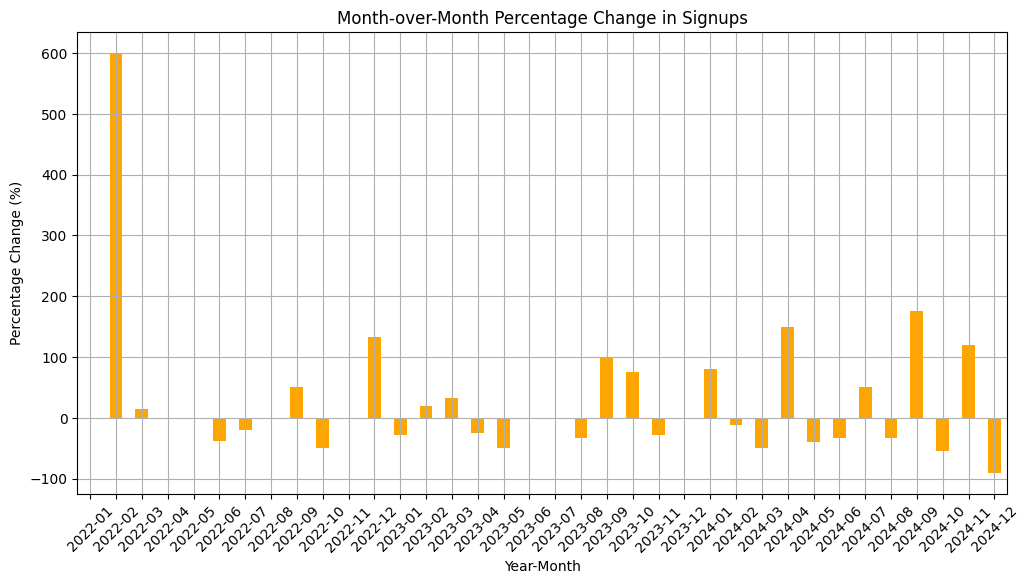

In [23]:
# Calculate month-over-month percentage change
monthly_signups_change = monthly_signups.pct_change() * 100

# Display the change in signups
print(monthly_signups_change)

# Visualize the change
monthly_signups_change.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Month-over-Month Percentage Change in Signups")
plt.xlabel("Year-Month")
plt.ylabel("Percentage Change (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [28]:
# Convert YearMonth back to datetime and set it as index
monthly_signups = monthly_signups.to_timestamp()

# Ensure the index has a frequency
monthly_signups.index = monthly_signups.index.to_period('M').to_timestamp()


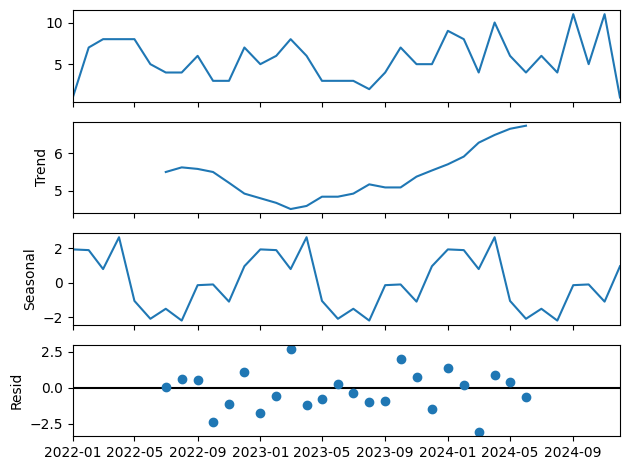

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_signups, model='additive', period=12)

# Plot the decomposition results
decomposition.plot()
plt.show()
